In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

import time
import sys

import sklearn

import forecast

import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_predict

from statsmodels.iolib.table import SimpleTable
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from patsy import dmatrices

In [2]:
path = '/home/kei/Desktop/data/innostage/innostage_task_5/tsData.json'

In [3]:
ts_data = pd.read_json(path)
original_df = ts_data.rename(columns = {'cnt': 'count'})


In [4]:
mean_df = original_df['count'].resample('20Min').mean()

mean_df.index = pd.DatetimeIndex(mean_df.index).to_period('20Min')

<Axes: >

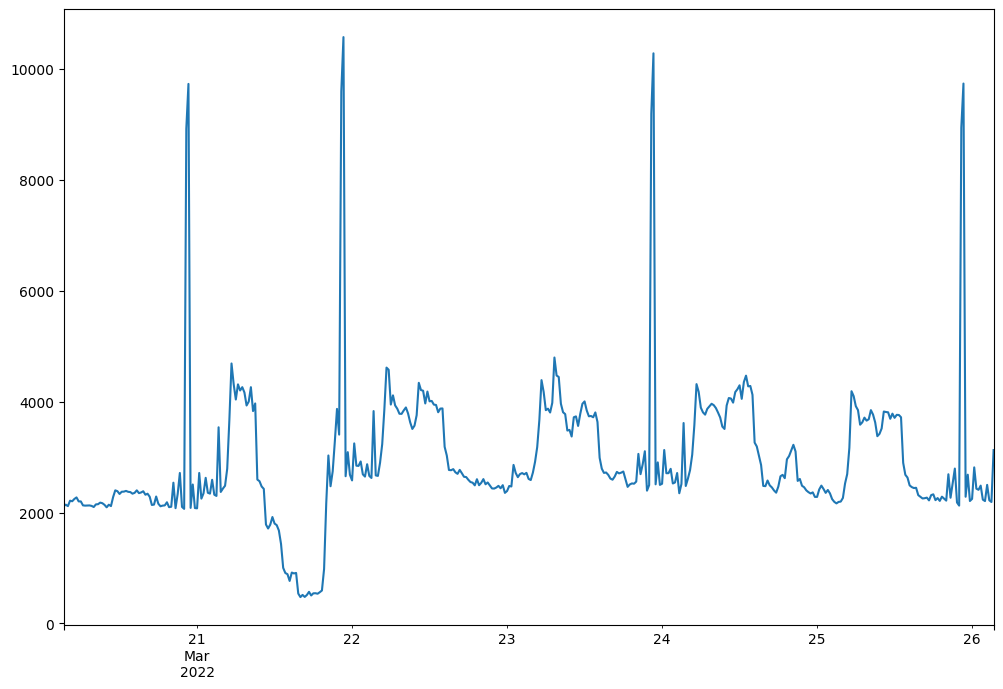

In [5]:
mean_df.plot(figsize = (12, 8))

<Axes: >

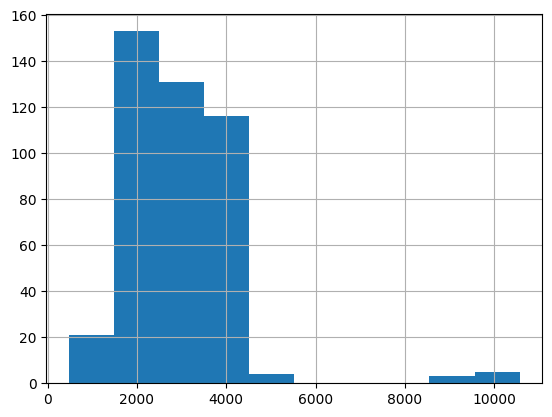

In [6]:
mean_df.hist()

In [7]:
stationarity_test_result = adfuller(mean_df.dropna())

print(f'adf-value: %.10f' % stationarity_test_result[0])
print('p-value: %.10f' % stationarity_test_result[1])
print(f'critical values {stationarity_test_result[4]}')


if stationarity_test_result[1] > 0.05:
    print('''
%.10f > 0.05
Нулевая гипотеза не отвергнута
Временной ряд не стационарен''' % stationarity_test_result[1])
    
else:
    print('''
%.10f < 0.05
Нулевая гипотеза отвергнута.
Временной ряд стационарен.
Порядок d равен 0''' % stationarity_test_result[1])

adf-value: -5.1094654442
p-value: 0.0000134174
critical values {'1%': -3.445721386098794, '5%': -2.868316661451884, '10%': -2.5703797268320376}

0.0000134174 < 0.05
Нулевая гипотеза отвергнута.
Временной ряд стационарен.
Порядок d равен 0


/home/kei/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


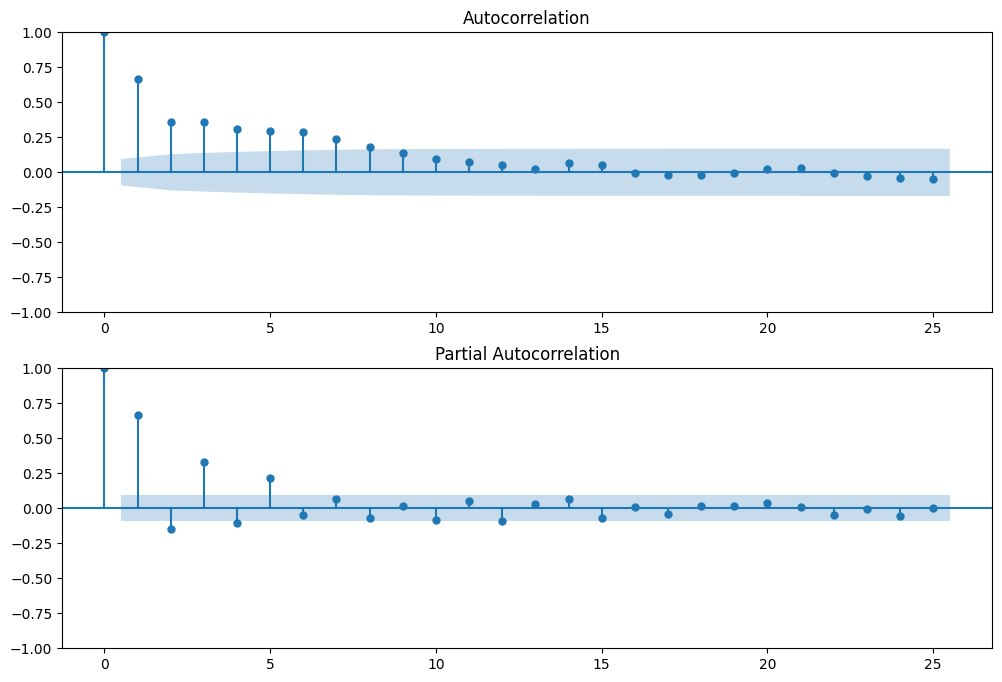

In [8]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mean_df, lags = 25, ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mean_df, lags = 25, ax = ax2)

**q = 7  
p = 5  
d = 0**

In [9]:
model = ARIMA(mean_df, order = (5, 0, 4)).fit()

/home/kei/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  433
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -3529.990
Date:                Tue, 28 Feb 2023   AIC                           7081.980
Time:                        15:36:53   BIC                           7126.758
Sample:                    03-20-2022   HQIC                          7099.657
                         - 03-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2947.6141    448.408      6.574      0.000    2068.751    3826.477
ar.L1          2.0466      0.165     12.371      0.000       1.722       2.371
ar.L2         -1.8769      0.262     -7.156      0.0

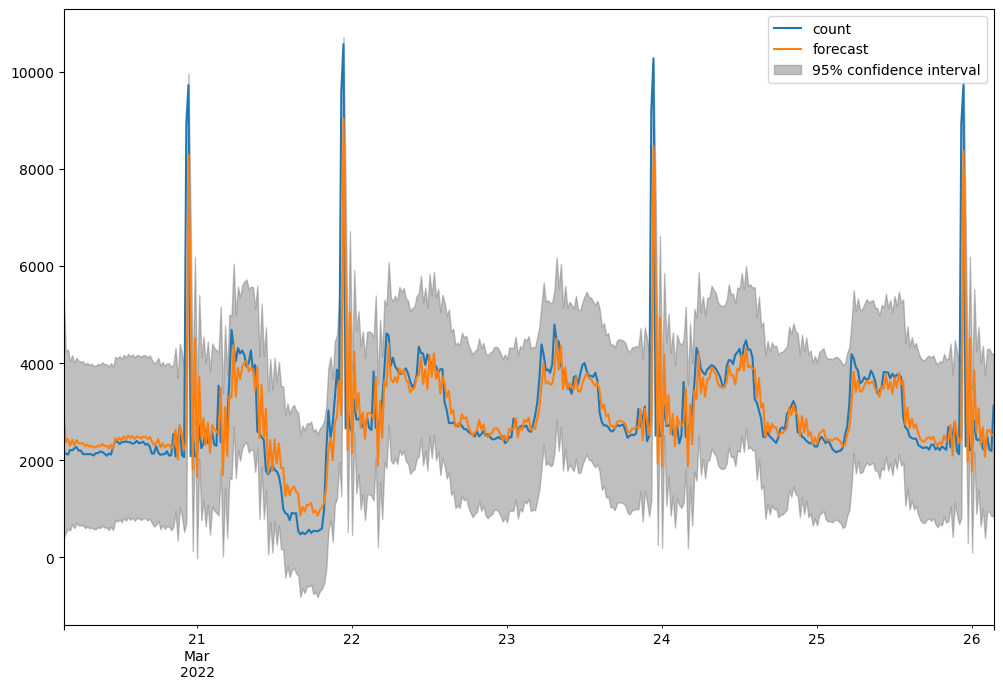

In [11]:
fig, ax = plt.subplots(figsize = (12, 8))

ax = mean_df.plot(ax=ax)

plot_predict(model, '2022-03-20', '2022-03-26', ax=ax, dynamic = False)

plt.show()

In [12]:
#EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

In [13]:
cleared_df = original_df.drop(original_df[original_df['count'] > 6000].index)
cleared_df = cleared_df.drop(cleared_df[cleared_df['count'] < 1500].index)

<Axes: >

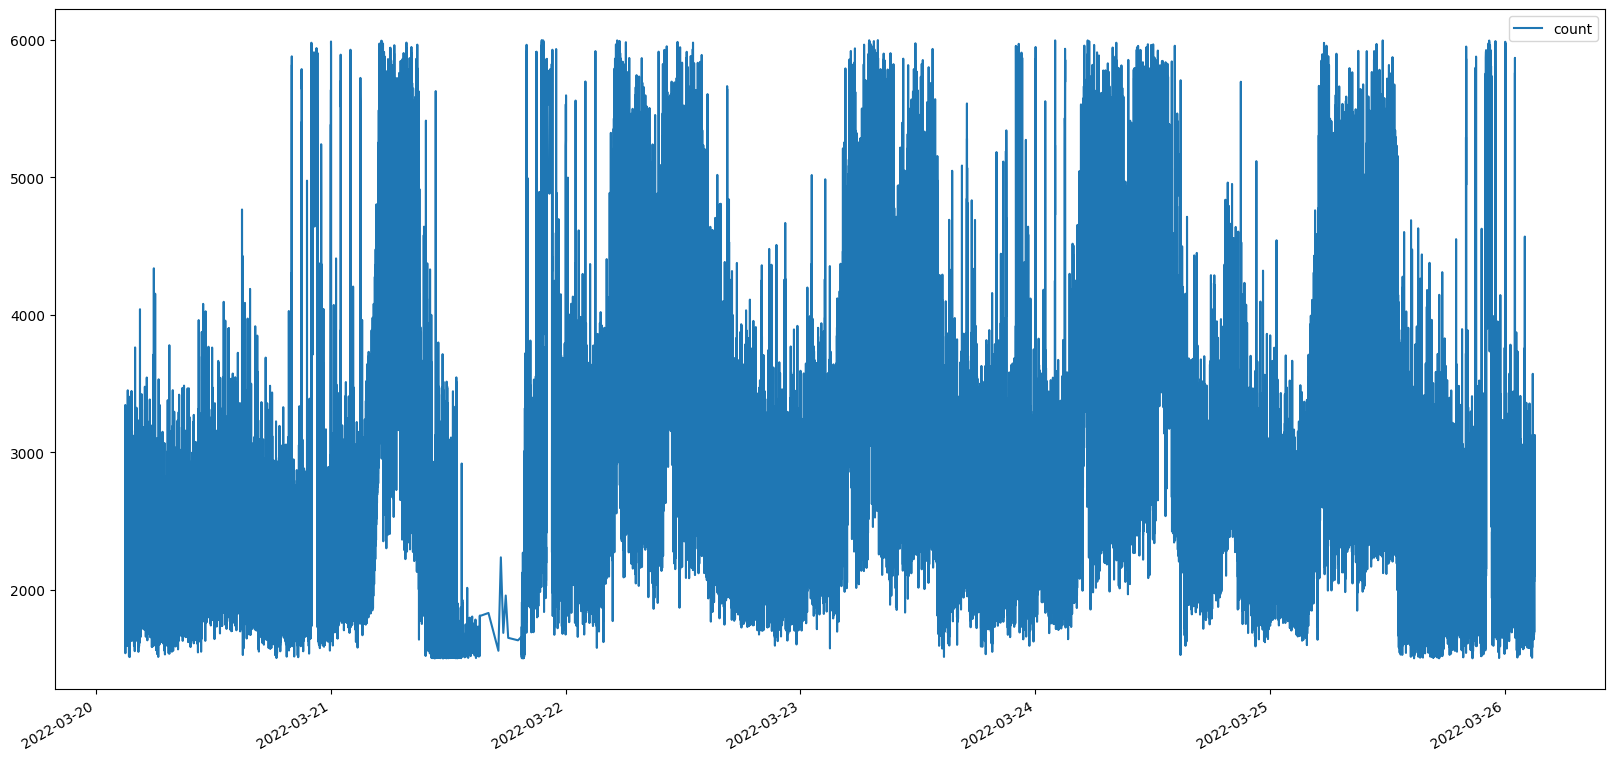

In [14]:
cleared_df.plot(figsize = (20, 10))

In [15]:
cleared_mean_df = cleared_df.resample('20Min').mean().dropna()
cleared_mean_df.index = pd.DatetimeIndex(cleared_mean_df.index).to_period('20Min')

<Axes: >

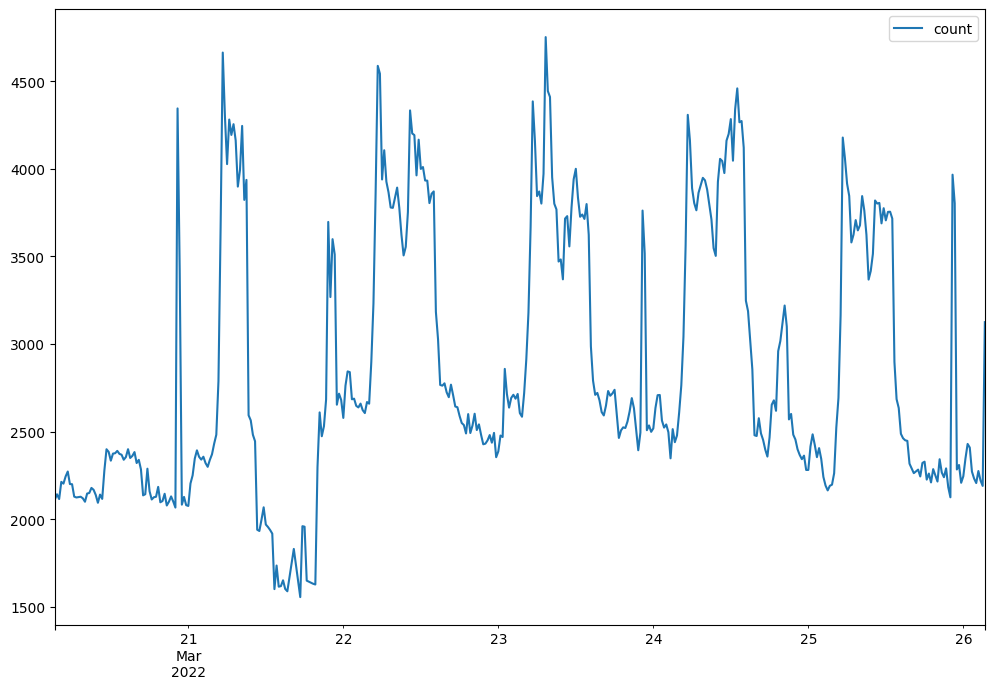

In [16]:
cleared_mean_df.plot(figsize = (12, 8))

In [17]:
if adfuller(cleared_mean_df)[1] > 0.05:
    print ('Ряд не стационарен')
else:
    print ('Ряд стационарен')

Ряд стационарен


/home/kei/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


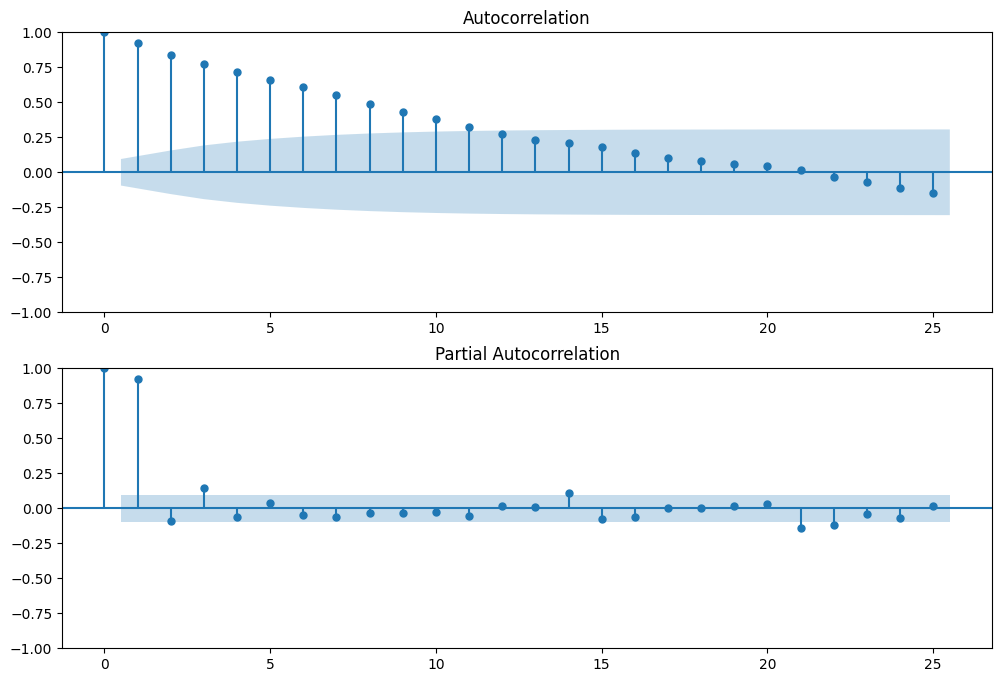

In [18]:
fig = plt.figure(figsize = (12, 8))

ax1 = fig.add_subplot(211)
fig = plot_acf(cleared_mean_df, lags = 25, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(cleared_mean_df, lags = 25, ax=ax2)

In [19]:
second_model = ARIMA(cleared_mean_df, order = (11, 0, 22)).fit()

/home/kei/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
print(second_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  427
Model:               ARIMA(11, 0, 22)   Log Likelihood               -2992.459
Date:                Tue, 28 Feb 2023   AIC                           6054.919
Time:                        15:37:37   BIC                           6196.906
Sample:                    03-20-2022   HQIC                          6111.001
                         - 03-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2872.6951    169.876     16.911      0.000    2539.745    3205.646
ar.L1          0.7800      0.653      1.195      0.232      -0.500       2.059
ar.L2          0.0565      1.022      0.055      0.9

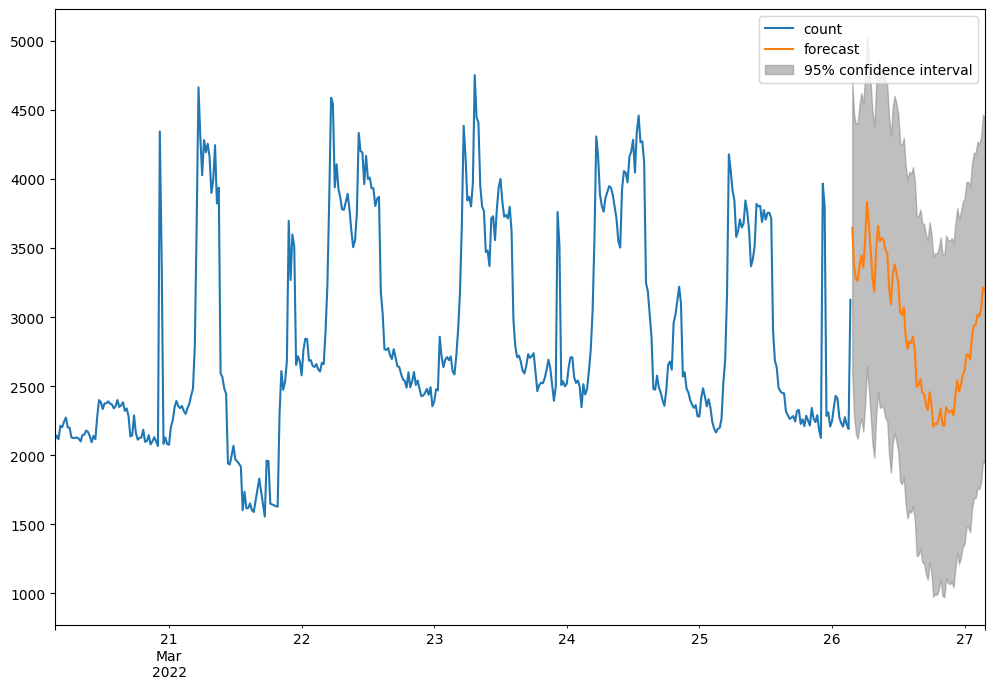

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))

ax = cleared_mean_df.plot(ax=ax)

plot_predict(second_model, '2022-03-26 03:10:00 ', '2022-03-27 03:20:00', ax=ax, dynamic = False)

plt.show()

In [22]:
# Анализ остатков

In [23]:
myresiduals_1 = pd.DataFrame(model.resid)
myresiduals_2 = pd.DataFrame(second_model.resid)
plt.rcParams.update({'figure.figsize' :(12,5), 'figure.dpi' : 120})

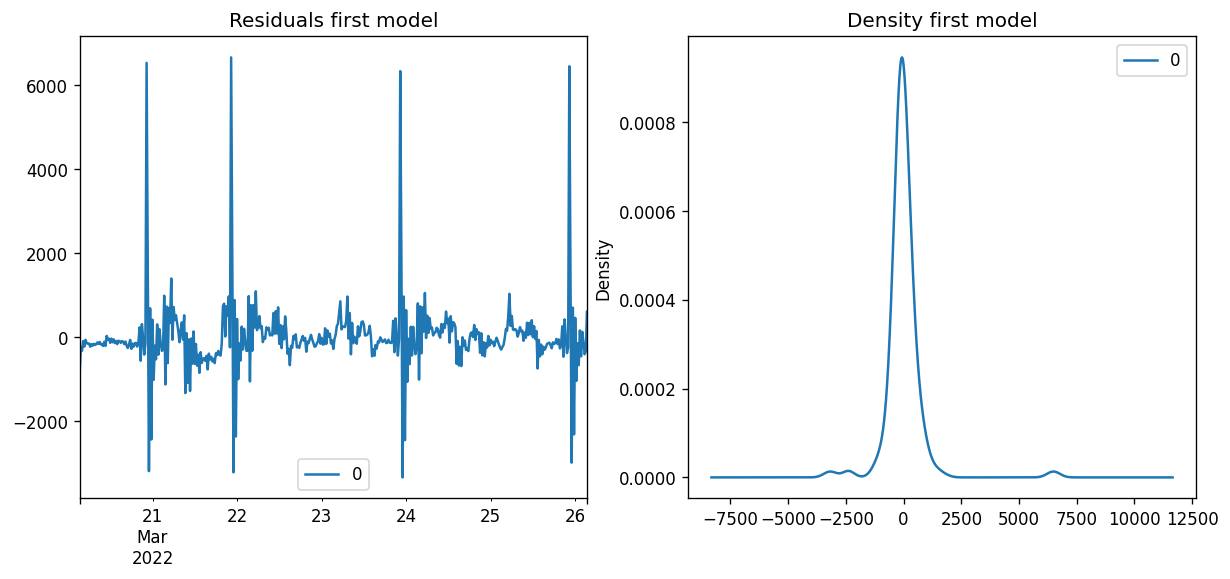

In [24]:
fig, ax = plt.subplots(1,2) 
myresiduals_1.plot(title = "Residuals first model", ax = ax[0]) 
myresiduals_1.plot(kind = 'kde', title = 'Density first model', ax = ax[1]) 
plt.show()

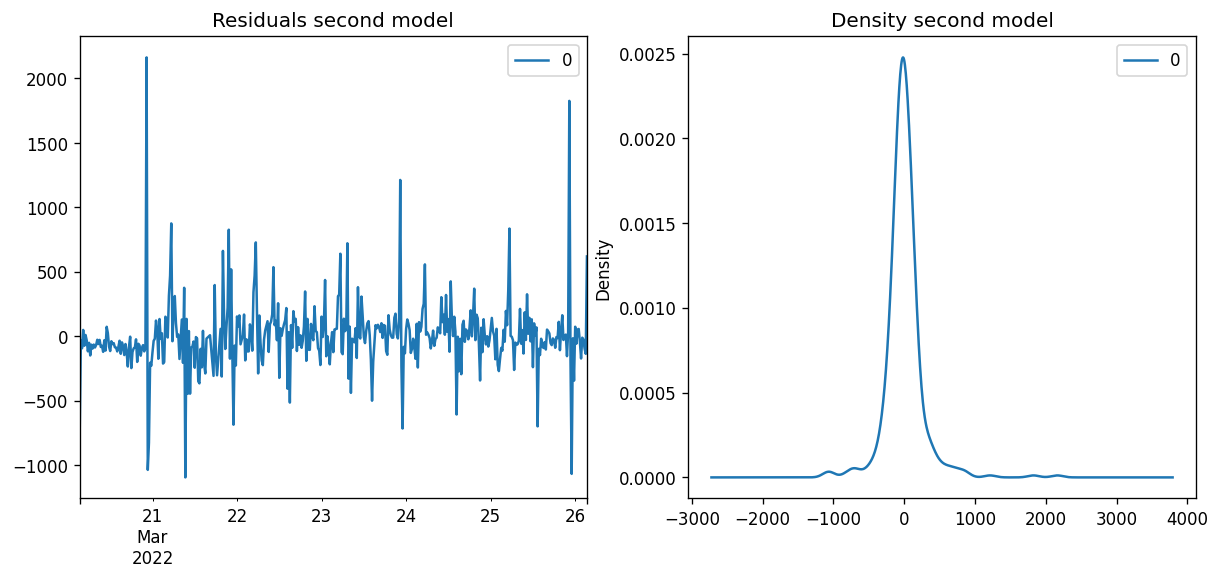

In [25]:
fig, ax = plt.subplots(1,2) 

myresiduals_2.plot(title = "Residuals second model", ax = ax[0]) 
myresiduals_2.plot(kind = 'kde', title = 'Density second model', ax = ax[1]) 
plt.show()